# K-means algorthm from scratch (theory)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# used to generate cluster-able data
from sklearn.datasets import make_blobs

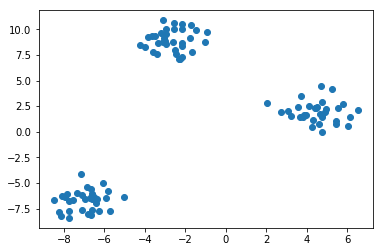

In [4]:
data = make_blobs(random_state=42)[0]

plt.scatter(data[:,0], data[:,1])
plt.show()

## Initilias centroids

In [5]:
import random

In [6]:
n_centroids = 3
centroids_x = []
centroids_y = []

random.seed(42)

for i in range(3):
    rand_x = random.randint(-10,10)
    rand_y = random.randint(-10,10)
    centroids_x.append(rand_x)
    centroids_y.append(rand_y)

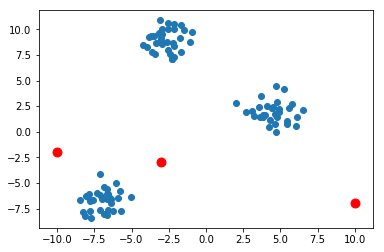

In [7]:
# plot data
plt.scatter(data[:,0], data[:,1])

# plot centroids
plt.scatter(centroids_x, centroids_y, color='r', s=80)
plt.show()
    

## Calculate closest data points to each cluster (Loop starting here)

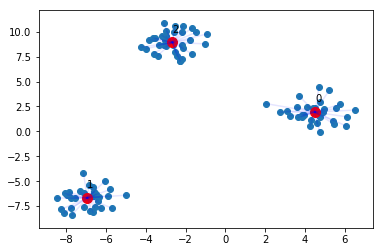

In [22]:
# fir the first 5 rows of data
closest_centroids = []
for row_n in range(100):
    
    data_x = data[row_n,0]
    data_y = data[row_n,1]
    
    distances_to_centroids = []

    for cent_x, cent_y in zip(centroids_x, centroids_y):
        
        x_diff = abs(cent_x - data_x)
        y_diff = abs(cent_y - data_y)
        
        distance = x_diff + y_diff
        
        distances_to_centroids.append(distance)
        
    # find shortest distance
    shortest_distance = min(distances_to_centroids)

    # find closest centroid
    closest_centroid_index = distances_to_centroids.index(shortest_distance)
    
    closest_centroids.append(closest_centroid_index)
    
    # draw line to closest centroid
    plt.plot([centroids_x[closest_centroid_index], data_x], 
             [centroids_y[closest_centroid_index], data_y], 
             color='b',
            alpha=0.1)
        

# plot data
plt.scatter(data[:,0], data[:,1])

# plot centroids
plt.scatter(centroids_x, centroids_y, color='r', s=100)

# draw lable to centroids
for i, (cent_x, cent_y) in enumerate(zip(centroids_x, centroids_y)):
    plt.text(x=cent_x,y=cent_y+1,s=str(i))

plt.show()


## Calculate average of colsest data point for each centroid

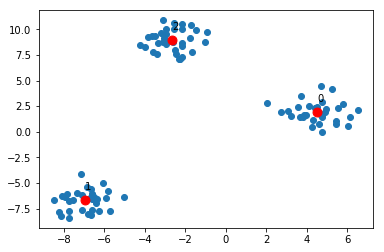

In [23]:
# recalculate center of mass for centroids

new_centroids_x = []
new_centroids_y = []

for centroid_index in [0,1,2]:
    
    count = 0
    sum_x = 0
    sum_y = 0
    for row_index, closest_centroid_index in enumerate(closest_centroids):
        
        if closest_centroid_index == centroid_index:
            sum_x += data[row_index, 0]
            sum_y += data[row_index, 1]
            count += 1
        
    avg_x = sum_x/count
    avg_y = sum_y/count
    
    new_centroids_x.append(avg_x)
    new_centroids_y.append(avg_y)

    
# plot data
plt.scatter(data[:,0], data[:,1])

# plot new centroids
plt.scatter(new_centroids_x, new_centroids_y, color='r', s=80)

# draw lable to centroids
for i, (cent_x, cent_y) in enumerate(zip(new_centroids_x, new_centroids_y)):
    plt.text(x=cent_x,y=cent_y+1,s=str(i))

plt.show()


## Re-Assign centroid postions to new average (Loop ending here)

In [21]:
centroids_x = new_centroids_x
centroids_y = new_centroids_y